In [50]:
# 导入所需的package
import seaborn as sns #用于画图
from bs4 import BeautifulSoup #用于爬取arxiv的数据
import re #用于正则表达式，匹配字符串的模式
import requests #用于网络连接，发送网络请求，使用域名获取对应信息
import json #读取数据，我们的数据为json格式的
import pandas as pd #数据处理，数据分析
import matplotlib.pyplot as plt #画图工具

In [57]:
def readArxivFile(path, columns=['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'], count=None):
    '''
    定义读取文件的函数
        path: 文件路径
        columns: 需要选择的列
        count: 读取行数
    '''
    
    data  = []
    with open(path, 'r') as f: 
        for idx, line in enumerate(f): 
            if idx == count:
                break
                
            d = json.loads(line)
            d = {col : d[col] for col in columns}
            data.append(d)

    data = pd.DataFrame(data)
    return data

data = readArxivFile('arxiv-metadata-oai-snapshot.json', 
                     ['id', 'authors', 'categories', 'authors_parsed'],
                    100000)

In [58]:
# 选择类别为cs.CV下面的论文
data2 = data[data['categories'].apply(lambda x: 'cs.CV' in x)]

# 拼接所有作者
all_authors = sum(data2['authors_parsed'], [])
print(all_authors)

[['Likforman-Sulem', 'Laurence', ''], ['Zahour', 'Abderrazak', ''], ['Taconet', 'Bruno', ''], ['Nelwamondo', 'Fulufhelo Vincent', ''], ['Marwala', 'Tshilidzi', ''], ['Berglund', 'Erik', ''], ['Sitte', 'Joaquin', ''], ['Zerai', 'Mourad', ''], ['Moakher', 'Maher', ''], ['Marteau', 'Pierre-François', '', 'VALORIA'], ['Ménier', 'Gilbas', '', 'VALORIA'], ['Spiller', 'Jonathan M.', ''], ['Marwala', 'T.', ''], ['Falk', 'D. L.', ''], ['Rubin', 'D. M.', ''], ['Marwala', 'T.', ''], ['Surajpal', 'Dhiresh R.', ''], ['Marwala', 'Tshilidzi', ''], ['Machowski', 'Lukasz A', ''], ['Marwala', 'Tshilidzi', ''], ['Graves', 'Alex', ''], ['Fernandez', 'Santiago', ''], ['Schmidhuber', 'Juergen', ''], ['Cohen', 'Asaf', ''], ['Weissman', 'Tsachy', ''], ['Merhav', 'Neri', ''], ['Jacquet', 'W.', ''], ['de Groen', 'P.', ''], ['Sofge', 'Donald A.', ''], ['Beezley', 'Jonathan D.', ''], ['Mandel', 'Jan', ''], ['Lichtenwalner', 'Peter F.', ''], ['Sofge', 'Donald A.', ''], ['Scurrell', 'Simon', ''], ['Marwala', 'Tshil

                                 0
0        Likforman-Sulem Laurence 
1               Zahour Abderrazak 
2                   Taconet Bruno 
3    Nelwamondo Fulufhelo Vincent 
4               Marwala Tshilidzi 
..                             ...
318          Sayadiyan Abolghasem 
319               Nazari Mohammad 
320                 Zayyani Hadi. 
321    Valiollahzadeh Seyyedmajid 
322         Babaie-Zadeh Massoud. 

[323 rows x 1 columns]


Text(0.5, 0, 'Count')

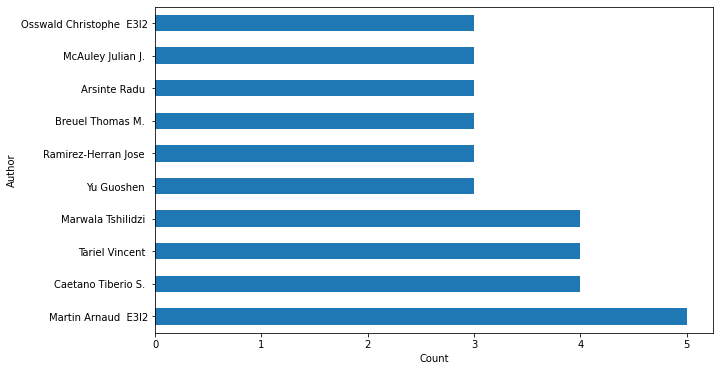

In [59]:
# 拼接所有的作者
authors_names = [' '.join(x) for x in all_authors]
authors_names = pd.DataFrame(authors_names)
print(authors_names)

# 根据作者频率绘制直方图
plt.figure(figsize=(10, 6))
authors_names[0].value_counts().head(10).plot(kind='barh')

# 修改图配置
names = authors_names[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')

Text(0.5, 0, 'Count')

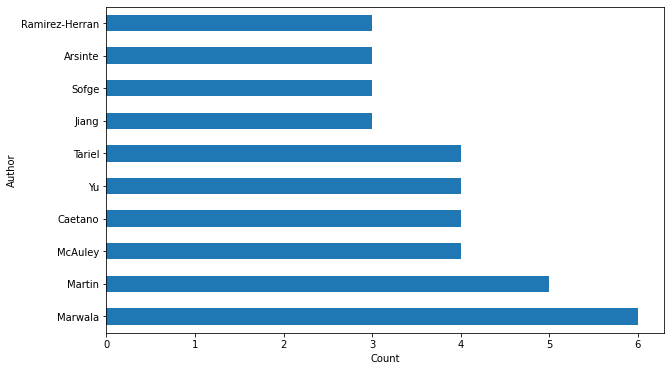

In [60]:
#接下来统计姓名姓，也就是authors_parsed字段中作者第一个单词：

authors_lastnames = [x[0] for x in all_authors]
authors_lastnames = pd.DataFrame(authors_lastnames)

plt.figure(figsize=(10, 6))
authors_lastnames[0].value_counts().head(10).plot(kind='barh')

names = authors_lastnames[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')

['L', 'Z', 'T', 'N', 'M', 'B', 'S', 'Z', 'M', 'M', 'M', 'S', 'M', 'F', 'R', 'M', 'S', 'M', 'M', 'M', 'G', 'F', 'S', 'C', 'W', 'M', 'J', 'd', 'S', 'B', 'M', 'L', 'S', 'S', 'M', 'R', 'S', 'B', 'G', 'C', 'C', 'B', 'M', 'C', 'S', 'B', 'F', 'O', 'G', 'R', 'D', 'R', 'H', 'O', 'O', 'D', 'K', 'R', 'K', 'R', 'K', 'R', 'M', 'L', 'B', 'P', 'H', 'D', 'M', 'C', 'B', 'M', 'C', 'A', 'K', 'T', 'B', 'K', 'J', 'D', 'X', 'K', 'T', 'O', 'G', 'S', 'A', 'S', 'B', 'E', 'N', 'A', 'C', 'D', 'V', 'A', 'G', 'T', 'I', 'B', 'B', 'B', 'D', 'K', 'E', 'P', 'B', 'P', 'C', 'S', 'A', 'P', 'L', 'O', 'G', 'A', 'R', 'G', 'W', 'Y', 'L', 'Z', 'B', 'V', 'J', 'B', 'D', 'L', 'P', 'P', 'M', 'P', 'A', 'I', 'A', 'M', 'S', 'H', 'A', 'M', 'S', 'V', 'C', 'F', 'M', 'M', 'R', 'L', 'K', 'X', 'X', 'G', 'D', 'B', 'C', 'R', 'C', 'N', 'S', 'R', 'L', 'C', 'C', 'B', 'L', 'Z', 'd', 'F', 'L', 'N', 'G', 'C', 'C', 'B', 'Y', 'Z', 'R', 'K', 'M', 'S', 'L', 'J', 'F', 'A', 'R', 'L', 'J', 'F', 'A', 'R', 'S', 'L', 'M', 'C', 'J', 'Z', 'H', 'T', 'Y', 'P',

Text(0.5, 0, 'First_alphabet')

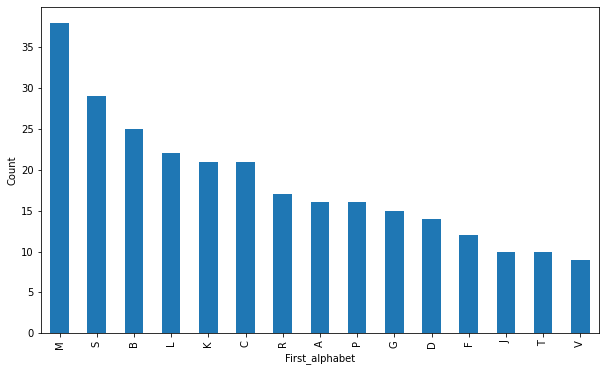

In [61]:
#统计所有作者姓第一个字符的频率，这个流程与上述的类似

authors_lastnames = [x[0] for x in all_authors]
authors_firstOne = [x[0] for x in authors_lastnames]
print(authors_firstOne)
authors_firstOne = pd.DataFrame(authors_firstOne)
print(authors_firstOne)
print(authors_firstOne[0])

plt.figure(figsize=(10, 6))
authors_firstOne[0].value_counts().head(15).plot(kind='bar')

names = authors_firstOne[0].value_counts().index.values[:15]
_ = plt.xticks(range(0, len(names)), names)
plt.ylabel('Count')
plt.xlabel('First_alphabet')